# This script is analyzing two data sets, "drug" and "placebo," using PyMC3 and Arviz. It starts by creating histograms of the two data sets using the Seaborn library. Then, it uses PyMC3 to create two models, one for each data set, where it sets a normal prior for the mean ("mu") and a uniform prior for the standard deviation ("sigma"). The script then generates samples from the prior distributions using the PyMC3 function "sample_prior_predictive." These samples are then stored in a DataFrame and plotted as histograms and kernel density plots using Arviz. This is likely to be a part of a Bayesian analysis for comparing the two groups.




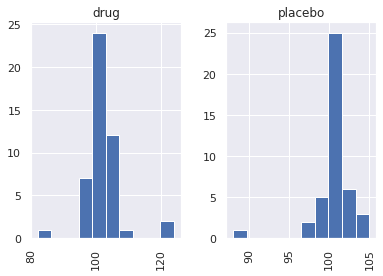

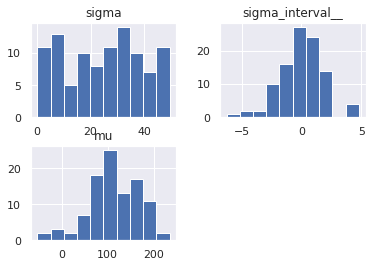

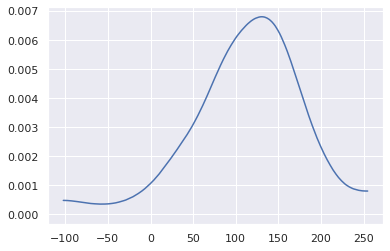

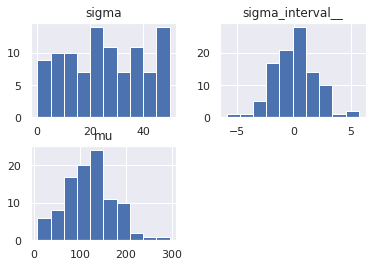

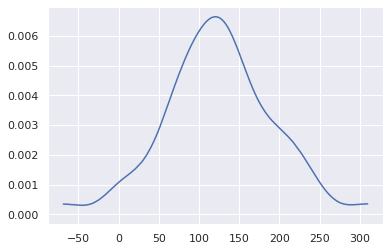

In [3]:
%matplotlib inline
import numpy as np
import pymc3 as pm
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import arviz as az
sns.set(color_codes=True)

np.random.seed(20090425)

drug = (101,100,102,104,102,97,105,105,98,101,100,123,105,103,100,95,102,106,
        109,102,82,102,100,102,102,101,102,102,103,103,97,97,103,101,97,104,
        96,103,124,101,101,100,101,101,104,100,101)
placebo = (99,101,100,101,102,100,97,101,104,101,102,102,100,105,88,101,100,
           104,100,100,100,101,102,103,97,101,101,100,101,99,101,100,100,
           101,100,99,101,100,102,99,100,99)

y1 = np.array(drug)
y2 = np.array(placebo)
y = pd.DataFrame(dict(value=np.r_[y1, y2], group=np.r_[['drug']*len(drug), ['placebo']*len(placebo)]))

y.hist('value', by='group');

with pm.Model() as modeldrug:
    mu = pm.Normal('mu', mu=120, sd=50)#prior for mu
    sigma = pm.Uniform('sigma', lower=0, upper=50)#prior for sigma
    drug = pm.Normal('drug', mu=mu, sd=sigma)#likelyhood
    prior_checks = pm.sample_prior_predictive(samples=100)

    prior_checks

priorDF=pd.DataFrame()
for key, value in prior_checks.items():
   if (key !='drug'):
        priorDF[key]=value
priorDF.head()   

priorDF.hist()


plt.show()
az.plot_kde((prior_checks['drug']))
   

with pm.Model() as modelplacebo:
    mu = pm.Normal('mu', mu=120, sd=50)#prior for mu
    sigma = pm.Uniform('sigma', lower=0, upper=50)#prior for sigma
    placebo = pm.Normal('placebo', mu=mu, sd=sigma)#likelyhood
    prior_checks = pm.sample_prior_predictive(samples=100)

    prior_checks

priorDF=pd.DataFrame()
for key, value in prior_checks.items():
   if (key !='placebo'):
        priorDF[key]=value
priorDF.head()   

priorDF.hist()


plt.show()
az.plot_kde((prior_checks['placebo']))
   

/usr/local/lib/python3.8/dist-packages/deprecat/classic.py:215: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  return wrapped_(*args_, **kwargs_)


ERROR:arviz.data.io_pymc3_3x:Got error No model on context stack. trying to find log_likelihood in translation.
/usr/local/lib/python3.8/dist-packages/arviz/data/io_pymc3_3x.py:98: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(
ERROR:arviz.data.io_pymc3_3x:Got error No model on context stack. trying to find log_likelihood in translation.
ERROR:arviz.data.io_pymc3_3x:Got error No model on context stack. trying to find log_likelihood in translation.
/usr/local/lib/python3.8/dist-packages/arviz/data/io_pymc3_3x.py:98: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(
/usr/l

ERROR:arviz.data.io_pymc3_3x:Got error No model on context stack. trying to find log_likelihood in translation.
/usr/local/lib/python3.8/dist-packages/arviz/data/io_pymc3_3x.py:98: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(
ERROR:arviz.data.io_pymc3_3x:Got error No model on context stack. trying to find log_likelihood in translation.
ERROR:arviz.data.io_pymc3_3x:Got error No model on context stack. trying to find log_likelihood in translation.
/usr/local/lib/python3.8/dist-packages/arviz/data/io_pymc3_3x.py:98: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


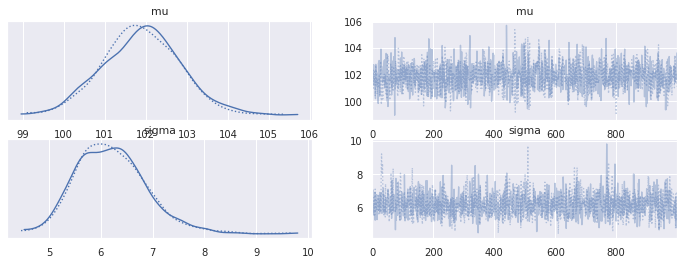

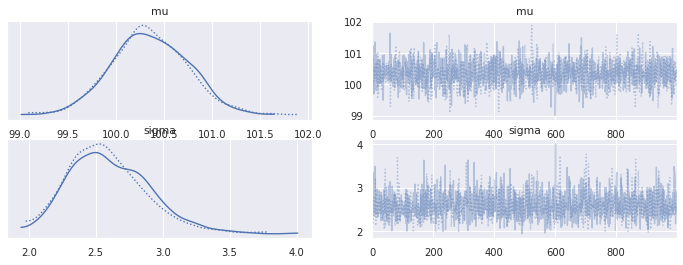

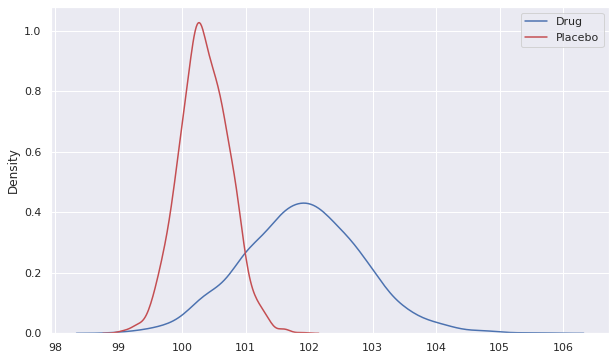

In [5]:
with pm.Model() as modeldrug:
    mu = pm.Normal('mu', mu=120, sd=50)#prior for mu
    sigma = pm.Uniform('sigma', lower=0, upper=50)#prior for sigma
    drug = pm.Normal('drug', mu=mu, sd=sigma, observed=y1)#likelyhood
    trace_drug = pm.sample(1000, tune=1000)

az.plot_trace(trace_drug)
az.summary(trace_drug)

with pm.Model() as modelplacebo:
    mu = pm.Normal('mu', mu=120, sd=50)#prior for mu
    sigma = pm.Uniform('sigma', lower=0, upper=50)#prior for sigma
    placebo = pm.Normal('placebo', mu=mu, sd=sigma, observed=y2)#likelyhood
    trace_placebo = pm.sample(1000, tune=1000)

az.plot_trace(trace_placebo)
az.summary(trace_placebo)

# Real value comparison graph
plt.figure(figsize=(10, 6))
sns.kdeplot(trace_drug['mu'], label='Drug', color='b')
sns.kdeplot(trace_placebo['mu'], label='Placebo', color='r')
plt.legend();
plt.show()







## It can be clearly seen from above graph for prior and posterior checks two datas is not similar or in other words if we compare the mu, sigma values trend behaviour is different and seperate from each other. 

## It can be clearly seen from final table drug and placebo is different it means in real life drug has some effects on patients but if we compared to t-test value on the lecture basis, the result is not good enough for comparison.  